__author__ = Steven Carriger,
__version__ = Fall 2022,
__date__ = 26/09/22

#Question 1 

__Description__ = The dataset I have chosen is the World Health Organizations data set. I chose the dataset over others because, the dataset had the data I wanted to look into without having to find another.
The data set has roughly 2600 rows without any modifications and has 14 columns.

__Questions__ = I want to find out which countries are most likely to be producing the most CO2 emissions and the similarities among them. A) Which continent has the most CO2 emissions? B) Which countries are in the top 5 of producing the most CO2 emissions, which one is the top? C) Is there a relationship between the CO2 emissions and Population annual growth rate, if so, what is the relationship?

__link__ = http://www.exploredata.net/Downloads/WHO-Data-Set

In [2]:
#imports and loading of the DataFrame 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('WHO.csv')
df

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4
2,Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,...,137535.56,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3
3,Andorra,4,2,NaN,NaN,NaN,83.0,83.0,74.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,5,3,146.0,67.4,3890.0,49.0,51.0,16557.0,2.8,...,8991.46,1.490000e+10,27.13,9.140000e+09,164.10,242.5,164.10,8578749.0,4.14,53.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Vietnam,198,6,25.0,90.3,2310.0,91.0,96.0,86206.0,1.4,...,101826.23,4.480000e+10,47.11,-1.940000e+09,20.20,23.4,20.20,21900000.0,2.90,26.4
198,West Bank and Gaza,199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,655.86,3.780000e+09,NaN,NaN,28.00,25.8,28.00,2596216.0,3.33,71.6
199,Yemen,200,1,83.0,54.1,2090.0,65.0,85.0,21732.0,3.0,...,20148.34,1.150000e+10,114.52,8.310000e+08,82.40,87.9,82.40,5759120.5,4.37,27.3
200,Zambia,201,3,161.0,68.0,1140.0,94.0,90.0,11696.0,1.9,...,2366.94,4.090000e+09,10.41,-4.470000e+08,175.30,163.8,175.30,4017411.0,1.95,35.0


In [88]:
#Question 2 data cleaning, selects the columns that are desired for the data frame and then removes any rows with a null value
# No inconsistencies found within data frame after this general cleanup.
df = df[['Country', 'Continent', 'Population annual growth rate (%)', 'Total_CO2_emissions']]
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

if df.Country.dtype != object:
    print('The column title was the data type:', df.Country.dtype)
    df['Country'] = df['Country'].apply(str)
    print('The column Country is now a:', df.Country.dtype)

pd.options.display.float_format = '{:.2f}'.format

df

,Country,Continent,Population annual growth rate (%),Total_CO2_emissions
0,Afghanistan,1,4.00,692.50
1,Albania,2,0.60,3499.12
2,Algeria,3,1.50,137535.56
4,Angola,3,2.80,8991.46
5,Antigua and Barbuda,4,1.30,421.36
...,...,...,...,...
196,Venezuela,5,1.70,148117.20
197,Vietnam,6,1.40,101826.23
199,Yemen,1,3.00,20148.34
200,Zambia,3,1.90,2366.94


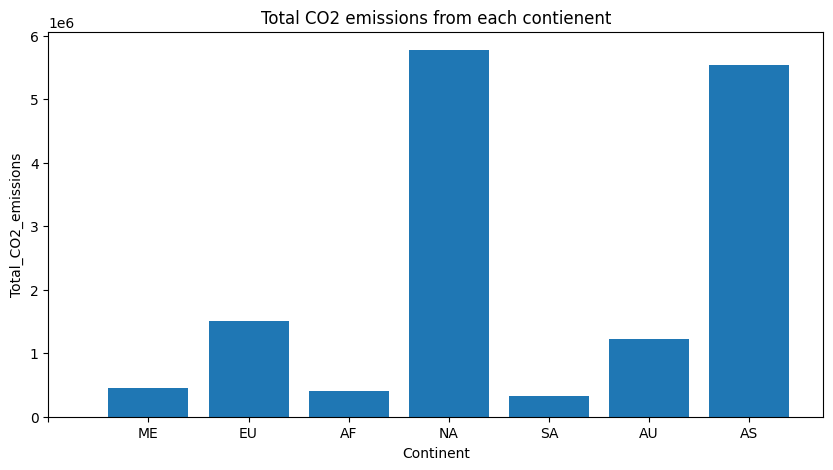

In [95]:
#Question A) Shows the amount of CO2 produced by each continent.
comparing_data = df[['Continent', 'Total_CO2_emissions']]
comparing_data = comparing_data.dropna()

x_labels = ['','ME', 'EU', 'AF', 'NA', 'SA', 'AU', 'AS']
x_tick_range = range(len(x_labels))

plt.figure(figsize=(10, 5))
plt.bar(comparing_data['Continent'], comparing_data['Total_CO2_emissions'])
plt.xticks(x_tick_range, x_labels)
plt.title('Total CO2 emissions from each contienent')
plt.xlabel('Continent')
plt.ylabel('Total_CO2_emissions')

plt.show()

Question A cont). This graph shows CO2 emissions from each continent. The graph shows clearly that North America is the continent producing the most CO2. This means that on average, a North American country is more likely to be producing more CO2 compared to a country in South America. For example, Canada has a higher likely hood of producing more CO2 than Chile based on their respective continents. This graph also shows that Asia is the second continent to be producing the most CO2. Overall, most of the distribution for the world's CO2 emissions are in North America, Asia, Europe, and Australia.

C:\Users\burny\AppData\Local\Temp\ipykernel_15040\422392760.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries.loc[len(top_countries.index)] = ['Other', '', '', other_countries]


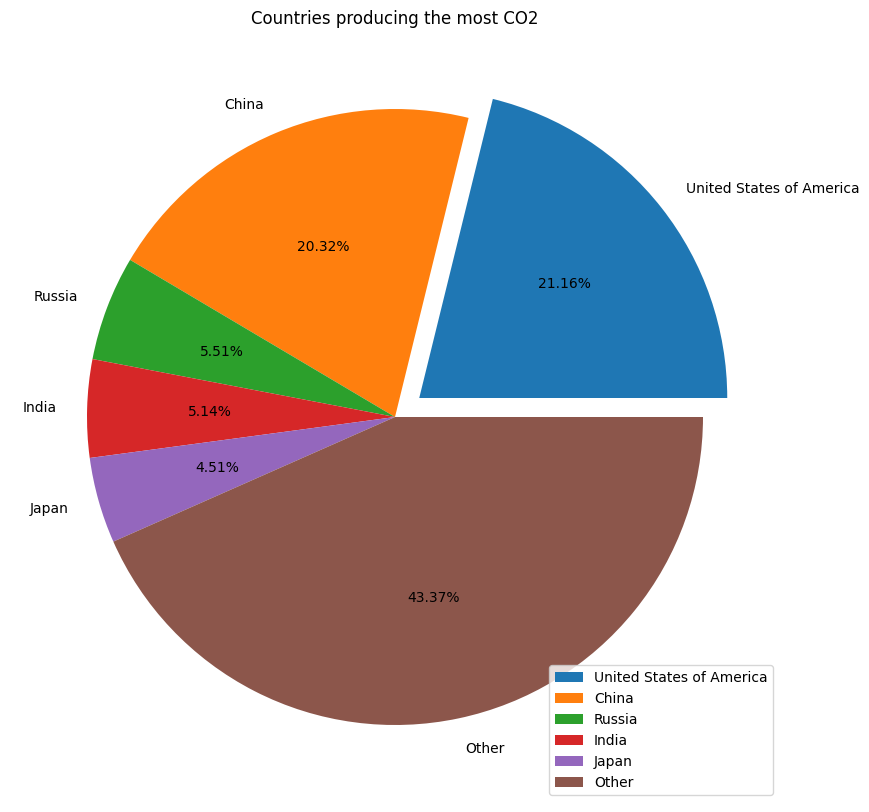

In [62]:
#Question B) Finds which countries are in the top 5 of producing the most CO2 emissions and then displays which one is the number one.

sorted_countries = df.sort_values('Total_CO2_emissions', ascending = False)

top_countries = sorted_countries.head(5)
other_countries = df['Total_CO2_emissions'].sum() - top_countries['Total_CO2_emissions'].sum()
top_countries.loc[len(top_countries.index)] = ['Other', '', '', other_countries]

plt.figure(figsize=(10, 10))
plt.pie(top_countries.iloc[:, 3], labels = top_countries.iloc[:, 0], autopct = '%.2f%%', explode = [.1,0,0,0,0,0])
plt.title('Countries producing the most CO2')

plt.legend(bbox_to_anchor=(1, 0), loc="lower right")
plt.show()

Question B Cont) The countries that produce the most CO2 are Japan, India, Russia, China, and The United States of America. The United States of America is the number one producer of CO2. The 'Other' in this chart represents the total amount of CO2 that is produced by ALL of the other countries in the world combined. This means that the top five countries producing CO2 are producing way over half of the world's CO2 emissions. So, if we wanted to take any measures to try and decrease the CO2 emission in our atmosphere, it would be best to include at lease one of these five countries to make a noticeable impact.

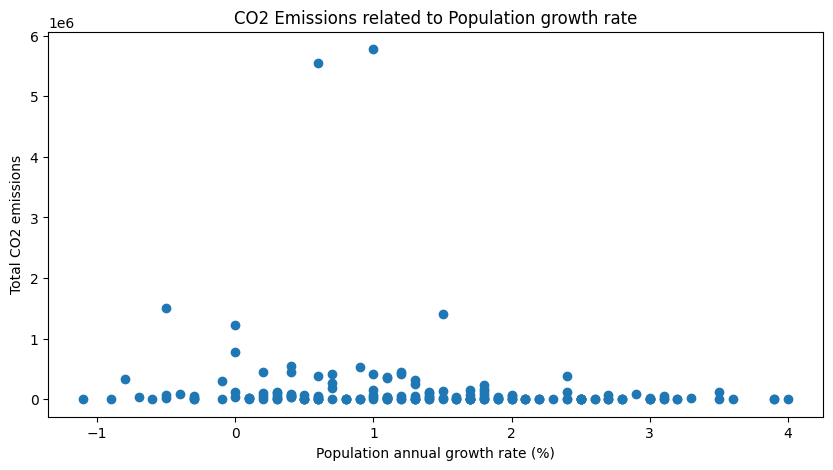

In [90]:
#Question C) determines if there is a relationship between the CO2 emissions and Population annual growth rate.
comparing_data = df[['Total_CO2_emissions', 'Population annual growth rate (%)']]

plt.figure(figsize=(10, 5))
plt.scatter(comparing_data['Population annual growth rate (%)'], comparing_data['Total_CO2_emissions'])
plt.xlabel('Population annual growth rate (%)')
plt.ylabel('Total CO2 emissions')
plt.title('CO2 Emissions related to Population growth rate')
plt.show()

Question C cont) There appears to be no correlation between a country's Population annual growth rate and total CO2 emissions. This means that the likelyhood of a country having a high CO2 emissions rate when their population growth rate is the same as any other range. The plots form almost a perfectly straight line which means that there is no definitive correlation between the two variables. This means that there is no way to predict a country's growth rate based on CO2 emissions and vice versa.

Question 4)
__Summary__: We can conclude from these results that CO2 emissions does not have an impact on our Population's annual growth rate. While we are able to determine that the USA is the country that produces the most CO2 in the world, China is still very close to the USA in terms of CO2 emissions. From the observations and data gathered, there seems to be a moderately strong correlation with the location of the country to the CO2 emissions. While yes, it does somewhat matter where a country is financially, we can conclude a country in the region of North America will more than likely be producing more CO2 than a country in Africa. One of the things that more than likely is at play here is the more advanced countries both infrastructurally and economically. These regions are already industrialized and have been constantly developing at much faster rates than other regions. So to conclude my findings, the common traits among the top CO2 producing countries are being around in the continents of North America, Asia, and Europe.

__Failed_To_Find__ = I failed to find a moderately strong correlation between the annual population growth rate to its CO2 emission. While yes, there could be an argument that there is a very weak one, I do not want to use a very weak and barely noticeable correlation compared to a stronger one. I had anticipated a moderately strong one and overestimated the expectations. 

__Future_Topics__ = One of the topics I would look further into is even more common trends the top CO2 producing countries have so that I can have an even stronger understanding of what causes a country to start producing so much CO2.

__Repository_Link__ = https://github.com/Steven-Carriger/Project1DataAnalytics-

THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor).

DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.
If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else. By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work.

Steven Carriger